<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# Import Required Libariries
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [2]:
# Create the nlp tokenizer for further processing. 

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [3]:
# Use the word count function from class lecture.

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts of words in the document set.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [4]:
# Import the data.

file = './data/yelp_coffeeshop_review_data.csv'

shops = pd.read_csv(file)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Clean up the star rating column and return the value as integer. 

shops['num_rating_cleaned'] = shops['star_rating'].apply(lambda x: int(x.strip()[0]))
shops.head()

,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4


In [6]:
# Separate the dates from the full review text into its own column.

shops['dates_cleaned'] = shops['full_review_text'].apply(lambda x: x.strip().split(' ')[0])
shops.head()

,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned,dates_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016


In [7]:
# Step 1 in cleaning the full reviews. Remove the dates from the beginning. 

shops['full_review_text_cleaned'] = np.nan

for index in range(len(shops['full_review_text'])):
    drop_text = shops['dates_cleaned'][index]
    shops['full_review_text_cleaned'][index] = shops['full_review_text'][index].replace(drop_text, '').strip()
    
shops.head()

/home/deanhadzi/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/deanhadzi/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned,dates_cleaned,full_review_text_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,1 check-in They are located within the Northcr...


In [8]:
# Step 2 - Clean the digits from the check-in text.

shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace(x[0], '').strip() if x[0].isdigit() else x)
shops.head()

,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned,dates_cleaned,full_review_text_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,check-in Love love loved the atmosphere! Every...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,check-in Listed in Brunch Spots I loved the ec...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,check-in They are located within the Northcros...


In [9]:
# Step 3 - Remove the check in text from the start of the reviews. 

shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace('check-in', '').strip())
shops['full_review_text_cleaned'] = shops['full_review_text_cleaned'].apply(lambda x: x.replace(x[0], '').strip() if x[0] == 's' else x)
shops.head(10)

,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned,dates_cleaned,full_review_text_cleaned
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,Love love loved the atmosphere! Every corner o...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,Listed in Brunch Spots I loved the eclectic an...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,They are located within the Northcross mall sh...
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4,11/20/2016,Very cute cafe! I think from the moment I step...
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating,4,10/27/2016,"Lited in ""Nuptial Coffee Bli!"", Anderon Lane i..."
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,5,11/2/2016,Love thi place! 5 tar for cleanline 5 tar for...
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3,10/25/2016,"Ok, let's try this approach... Pros: Music Se..."
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,5,11/10/2016,Thi place ha been hown on my ocial media for d...


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
# Create good vs bad column based on the rating value.  

shops['good_vs_bad'] = ['good' if x >= 4 else 'bad' for x in shops['num_rating_cleaned']]
shops.head()

,coffee_shop_name,full_review_text,star_rating,num_rating_cleaned,dates_cleaned,full_review_text_cleaned,good_vs_bad
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,11/25/2016,Love love loved the atmosphere! Every corner o...,good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust...",good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,11/30/2016,Listed in Brunch Spots I loved the eclectic an...,good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,11/25/2016,Very cool decor! Good drinks Nice seating How...,bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,12/3/2016,They are located within the Northcross mall sh...,good


In [11]:
# Make tokens using the Tokenizer Pipe

tokens = []
for doc in tokenizer.pipe(shops['full_review_text_cleaned'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops['spaCy_tokens'].head()

0    [Love, love, loved, the, atmosphere!, Every, c...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [Listed, in, Brunch, Spots, I, loved, the, ecl...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [They, are, located, within, the, Northcross, ...
Name: spaCy_tokens, dtype: object

In [12]:
# It looks like we have an empty string at rank 6. We need to remove it.

wc = count(shops['spaCy_tokens'])
print(wc.shape)
wc.head(10)

(46634, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
59,the,6520,27779,1.0,0.035237,0.035237,0.856092
50,and,6804,25748,2.0,0.032660,0.067897,0.893382
68,a,6195,22511,3.0,0.028554,0.096452,0.813419
65,I,5469,19783,4.0,0.025094,0.121546,0.718093
58,to,5631,16904,5.0,0.021442,0.142988,0.739364
64,,4362,15090,6.0,0.019141,0.162129,0.572742
61,of,5087,12495,7.0,0.015849,0.177978,0.667936
94,is,4303,9838,8.0,0.012479,0.190458,0.564995
95,in,4431,8903,9.0,0.011293,0.201751,0.581801
55,was,3394,8593,10.0,0.010900,0.212651,0.445641


In [25]:
# Extract the shadow_word and add it to list of stop_words

shadow_word = wc.at[8, 'word']
print(type(shadow_word))

STOP_WORDS = nlp.Defaults.stop_words.union([shadow_word, ' '])

<class 'str'>


In [14]:
# To make this comparison more interesting, let's compare: All Reviews, Good Revies, and Bad Reviews
# Before we continue with our clean up.

shops['good'] = shops['good_vs_bad'].str.contains('good', case=False)
shops['bad'] = shops['good_vs_bad'].str.contains('bad', case=False)

(46634, 7) (39623, 7) (18121, 7)


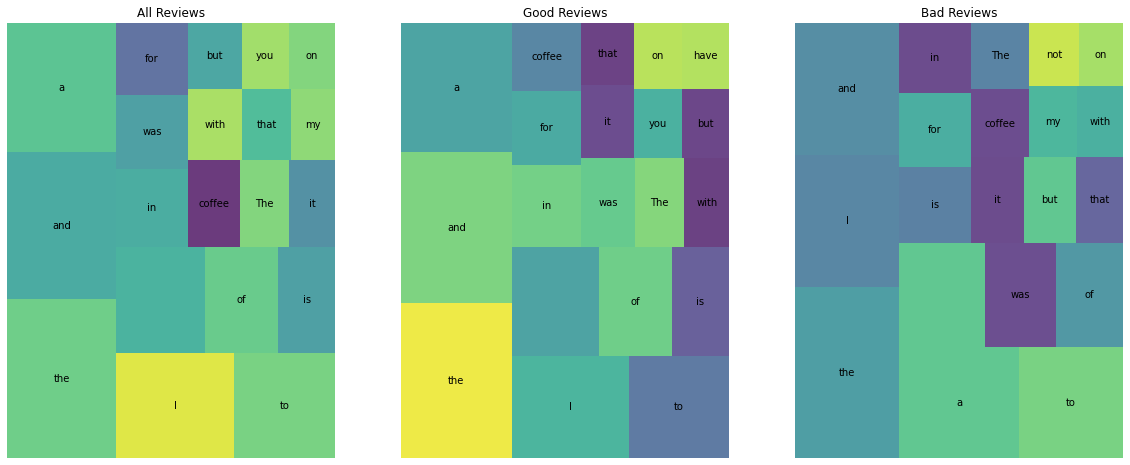

In [15]:
# Use the Function for all reviews, good reviews only, and bad reviews only
wc = count(shops['spaCy_tokens'])
wc_good = count(shops[shops['good'] == 1]['spaCy_tokens'])
wc_bad = count(shops[shops['bad'] == 1]['spaCy_tokens'])
print(wc.shape, wc_good.shape, wc_bad.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_good_top20 = wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [29]:
# Start with removing the stop words.

tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['full_review_text_cleaned'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spaCy_tokens_v2'] = tokens
shops['spaCy_tokens_v2'].head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [located, northcross, mall, shopping, center, ...
Name: spaCy_tokens_v2, dtype: object

In [30]:
wc_v2 = count(shops['spaCy_tokens_v2'])
print(wc_v2.shape)
wc_v2.head()

(40802, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12,coffee,4215,8081,1.0,0.020655,0.020655,0.553440
149,place,3064,4357,2.0,0.011136,0.031791,0.402311
100,great,2438,3250,3.0,0.008307,0.040098,0.320116
186,like,2036,2909,4.0,0.007435,0.047533,0.267332
163,good,2096,2799,5.0,0.007154,0.054688,0.275210


In [ ]:
# Use the Function for all reviews, good reviews only, and bad reviews only
wc_v2 = count(shops['spaCy_tokens_v2'])
wc_good_v2 = count(shops[shops['good'] == 1]['spaCy_tokens_v2'])
wc_bad_v2 = count(shops[shops['bad'] == 1]['spaCy_tokens_v2'])
print(wc_v2.shape, wc_good_v2.shape, wc_bad_v2.shape)

# Get top 20 word occurences for each set of data
wc_top20_v2 = wc_v2[wc_v2['rank'] <= 20]
wc_good_top20_v2 = wc_good_v2[wc_good_v2['rank'] <= 20]
wc_bad_top20_v2 = wc_bad_v2[wc_bad_v2['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Reviews')
squarify.plot(sizes=wc_top20_v2['pct_total'], label=wc_top20_v2['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('Good Reviews')
squarify.plot(sizes=wc_good_top20_v2['pct_total'], label=wc_good_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('Bad Reviews')
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

